# Polynomial Regression

In [9]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Generating X and y 
X = np.array([258.0,270.0,294.0,320.0,342.0,368.0,396.0,446.0,480.0,586.0])[:, np.newaxis]
y = np.array([236.4,234.4,252.8,298.6,314.2,342.2,360.8,368.0,391.2,390.8])

In [4]:
# Initializing simplle linear regression
lr = LinearRegression()
pr = LinearRegression()

In [5]:
# Adding a seconnd-degree polynomial term to linear regression
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)

In [6]:
# Fitting the simple linear regression model for comparison with Polynomial Regression
lr.fit(X, y)
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

In [7]:
# Fitting the Polynomial Regression model on the transformed features
pr.fit(X_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

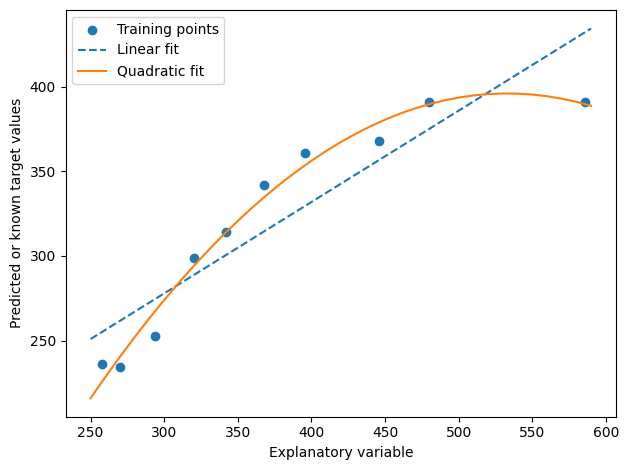

In [8]:
# Plotting the results
plt.scatter(X, y, label = 'Training points')
plt.plot(X_fit, y_lin_fit, label = 'Linear fit', linestyle = '--')
plt.plot(X_fit, y_quad_fit, label = 'Quadratic fit')
plt.xlabel('Explanatory variable')
plt.ylabel('Predicted or known target values')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

**We can see that the polynomial fit captures the relationship between the response and explanatory variables much better than the linear fit.**

In [11]:
# Comparison of metrics
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)

# MSE
mse_lin = mean_squared_error(y, y_lin_pred)
mse_quad = mean_squared_error(y, y_quad_pred)
print(f"Training MSE Linear: {mse_lin:.3f}"
    f", quadratic: {mse_quad:.3f}")

# R2 score
r2_lin = r2_score(y, y_lin_pred)
r2_quad = r2_score(y,y_quad_pred)
print(f"Training R2 Linear: {r2_lin:.3f}"
    f", quadratic: {r2_quad:.3f}")

Training MSE Linear: 569.780, quadratic: 61.330
Training R2 Linear: 0.832, quadratic: 0.982


**The MSE decreased from 570 (linear fit) to 61 (quadratic fit); also, the coefficient of determination reflects a closer fit of the quadratic model (R2 = 0.982) as opposed to the linear fit (R2 = 0.832).**